<br/>
<img src="images/cd-logo-blue-600x600.png" alt="" width="130px" align="left"/>
<img src="images/cd-logo-blue-600x600.png" alt="" width="130px" align="right"/>
<div align="center">
<h2>Bootcamp Data Science - Módulo 3</h2><br/>
<h1>Aprendizaje no supervisado</h1>
<br/><br/>
    <b>Instructor Principal:</b> Patricio Olivares polivares@codingdojo.la <br/>
    <b>Instructor Asistente:</b> Daniela Blanco dblanco@codingdojo.la<br/><br/>
    <b>Coding Dojo</b>
</div>
<br>
Fuente: "Hands-on Machine Learning with Scikit-Learn, Keras & TensorFlow"

# Algoritmos de aprendizaje supervisados vs no supervisados

# Aprendizaje supervisado

- Algoritmo es guiado en el proceso de aprendizaje (se le indica qué debe aprender)
- Ej:
    - En algoritmo de regresión lineal, el modelo calcula parámetros que mejor se ajustan a datos conocidos
- ¿Qué ocurre si no contamos con esta información?
    - R: Algoritmos no supervisados

## Aprendizaje no supervisado

- No existe información previa sobre qué es lo que debe aprender el algoritmo
- El algoritmo tiene libertad para aprender patrones de interés en los datos

# Agrupamiento (Clustering)

- Al igual que en clasificación, clustering asigna cada dato a un grupo
- En el caso de clustering, los grupos **no son conocidos de antemano**

<img src='images/clusteringExample.png' width=800>

# K-Means 

- K-Means permite agrupar datos a partir de un número **especificado** de clusters.
- Para K-Means es necesario **especificar** el número de clusters de antemano. En algunos casos este número sera obvio, pero en otros no.
- Cada clúster se marca inicialmente con un centroide. Este se va actualizando hasta ajustarse a las agrupaciones existentes

Text(0, 0.5, 'Petal width')

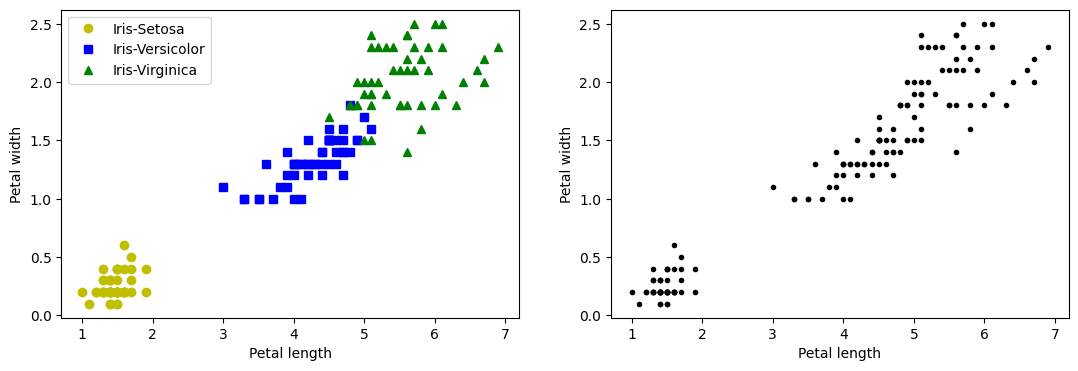

In [2]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

# Cargamos nuestro dataset de flores iris
iris = load_iris()
X = iris.data[:,2:]
y = iris.target # El target SOLO se utilizará como referencia. En ningún momento utilizaremos el targe en el entrenamiento!!!

# Gráfico de grupos reales de flores iris
fig = plt.figure(figsize=(13,4))
ax1 = fig.add_subplot(1,2,1)
ax1.plot(X[y==0,0],X[y==0,1],'yo')
ax1.plot(X[y==1,0],X[y==1,1],'bs')
ax1.plot(X[y==2,0],X[y==2,1],'g^')
ax1.legend(['Iris-Setosa','Iris-Versicolor','Iris-Virginica'])
ax1.set_xlabel('Petal length')
ax1.set_ylabel('Petal width')


ax2 = fig.add_subplot(1,2,2)
ax2.plot(X[:, 0],X[:,1],'k.')
ax2.set_xlabel('Petal length')
ax2.set_ylabel('Petal width')

In [13]:
# Entrenamiento de K-Means
from sklearn.cluster import KMeans

k = 3 # Este es el número de agrupaciones (nuestro supuesto)
kmeans = KMeans(n_clusters=k)
# OJO, no es que nos falte la división en training y test. NO es necesaria en este caso.
kmeans.fit(X)

# Luego de haber determinado los grupos sobre el dataset X, le pedimos a K-Means que genere las agrupaciones
# para cada data de entrada
y_pred = kmeans.predict(X)

/home/polivares/miniforge3/envs/DataScience/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


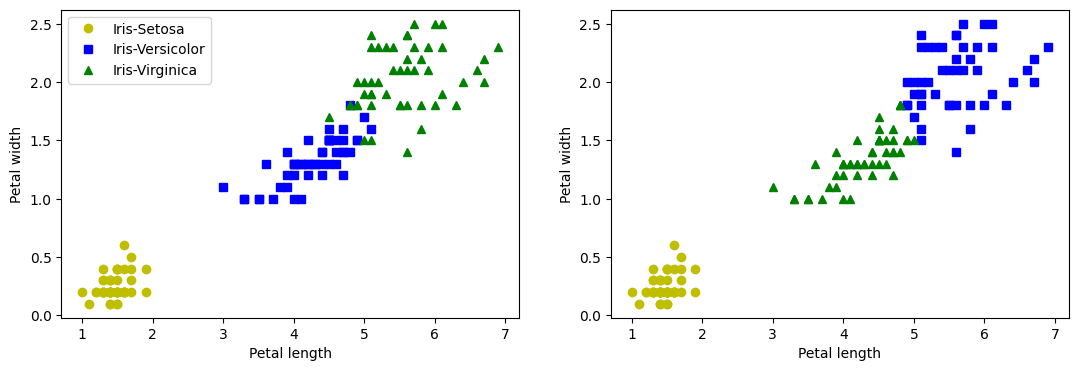

-31.37135897435898


In [14]:
# Gráfico que compara las agrupaciones generadas por K-Means vs los grupos
# reales del dataset original
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(13,4))
ax1 = fig.add_subplot(1,2,1)
ax1.plot(X[y==0,0],X[y==0,1],'yo')
ax1.plot(X[y==1,0],X[y==1,1],'bs')
ax1.plot(X[y==2,0],X[y==2,1],'g^')
ax1.legend(['Iris-Setosa','Iris-Versicolor','Iris-Virginica'])
ax1.set_xlabel('Petal length')
ax1.set_ylabel('Petal width')

# Índice de agrupación cambia, pero agrupaciones se mantienen
ax2 = fig.add_subplot(1,2,2)
ax2.plot(X[y_pred==0,0],X[y_pred==0,1],'bs')
ax2.plot(X[y_pred==1,0],X[y_pred==1,1],'yo')
ax2.plot(X[y_pred==2,0],X[y_pred==2,1],'g^')
# ax2.plot(X[y_pred==3,0],X[y_pred==3,1],'k*')
ax2.set_xlabel('Petal length')
ax2.set_ylabel('Petal width')

plt.show()

# Score representa la inercia del modelo (distancia cuadrática media entre cada dato y su centroide)
# Se muestra con valor negativo pues método score de scikit learn debe cumplir con
# "mayor valor, mejor"
print(kmeans.score(X))

## Método del codo

- En caso de no conocer el número de clusters, una buena aproximación es el método del codo
- Se selecciona como número de clusters a aquel que produce **el último decremento "importante" en la inercia.**

/home/polivares/miniforge3/envs/DataScience/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/polivares/miniforge3/envs/DataScience/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/polivares/miniforge3/envs/DataScience/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/polivares/miniforge3/envs/DataScience/lib/python3.10/site-packages/sklearn/clus

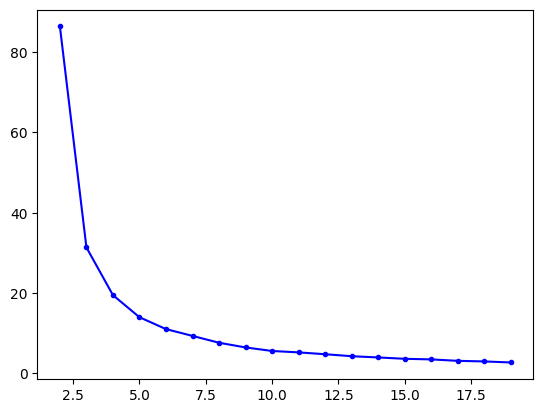

In [15]:
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

iris = load_iris()
X = iris.data[:,2:]

score = []
k_clusters = range(2,20) # Este range va de 2 a 20
for k in k_clusters:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    score.append(-kmeans.score(X))
    
plt.plot(k_clusters, score,'b.-')

# Silhouette score

- Medida utilizada para determinar la separación entre clústeres, o en otras palabras, qué tan similar es cada muestra al resto de muestras de su clúster.
- Mientras más cercano a 1, clúster se encuentran mejor separados y más compactos
- Por cada muestra se calcula el coeficiente de silueta dado por la siguiente fórmula

$$ \frac{b-a}{\text{max}(b,a)} $$

donde $a$ es la distancia intra clúster y $b$ representa la distancia inter clúster.

<img src='images/silueta.jpg' width=600>

Fuente: https://towardsdatascience.com/silhouette-coefficient-validating-clustering-techniques-e976bb81d10c

/home/polivares/miniforge3/envs/DataScience/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/polivares/miniforge3/envs/DataScience/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/polivares/miniforge3/envs/DataScience/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/polivares/miniforge3/envs/DataScience/lib/python3.10/site-packages/sklearn/clus

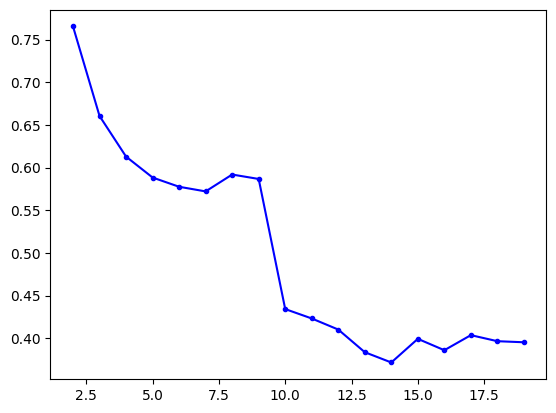

In [16]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

score = []
k_clusters = range(2,20) # Este range va de 1 a 20
for k in k_clusters:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    score.append(silhouette_score(X, kmeans.labels_))
plt.plot(k_clusters, score,'b.-')

# Agrupamiento Jerárquico

- Algoritmo que define jerarquía en los datos para generar agrupaciones

- **Agrupamiento aglomerativo**: A partir de los datos individuales, se agrupan gradualmente hasta formar uno o mútiples grandes grupos. Aproximación *bottom up*.
- **Agrupamiento divisional**: A partir de los datos agrupados, se dividen gradualmente hasta formar mútiples grupos pequeños. Aproximación *Up bottom*

In [3]:
from sklearn.cluster import AgglomerativeClustering

# Escalamiento "puede" mejorar clusterings generados
# # Escalamiento de datos 
# scaler = StandardScaler()
# # Ajustar y transformar datos
# X_scaled = scaler.fit_transform(X)


agg_cluster = AgglomerativeClustering(n_clusters=3)
y_pred = agg_cluster.fit_predict(X)

In [4]:
print(y_pred)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 2
 2 2 2 0 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 2 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]


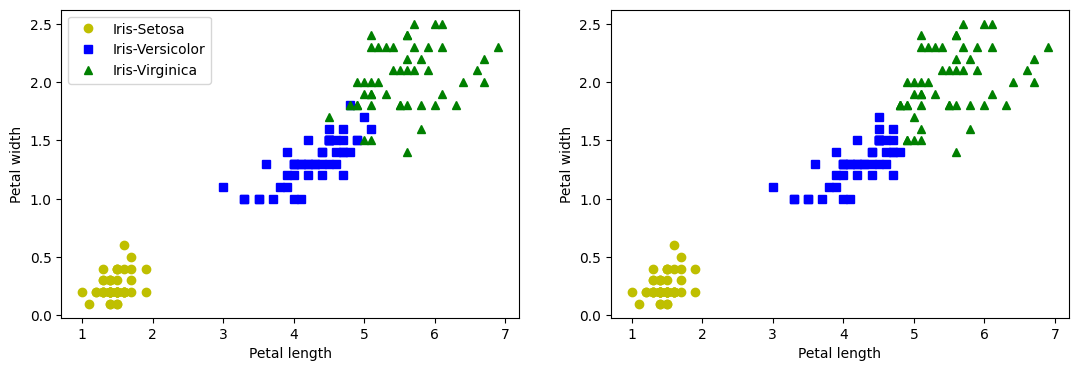

In [5]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(13,4))
ax1 = fig.add_subplot(1,2,1)
ax1.plot(X[y==0,0],X[y==0,1],'yo')
ax1.plot(X[y==1,0],X[y==1,1],'bs')
ax1.plot(X[y==2,0],X[y==2,1],'g^')
ax1.legend(['Iris-Setosa','Iris-Versicolor','Iris-Virginica'])
ax1.set_xlabel('Petal length')
ax1.set_ylabel('Petal width')

# Índice de agrupación cambia, pero agrupaciones se mantienen
ax2 = fig.add_subplot(1,2,2)
ax2.plot(X[y_pred==0,0],X[y_pred==0,1],'g^')
ax2.plot(X[y_pred==1,0],X[y_pred==1,1],'yo')
ax2.plot(X[y_pred==2,0],X[y_pred==2,1],'bs')
ax2.set_xlabel('Petal length')
ax2.set_ylabel('Petal width')

plt.show()

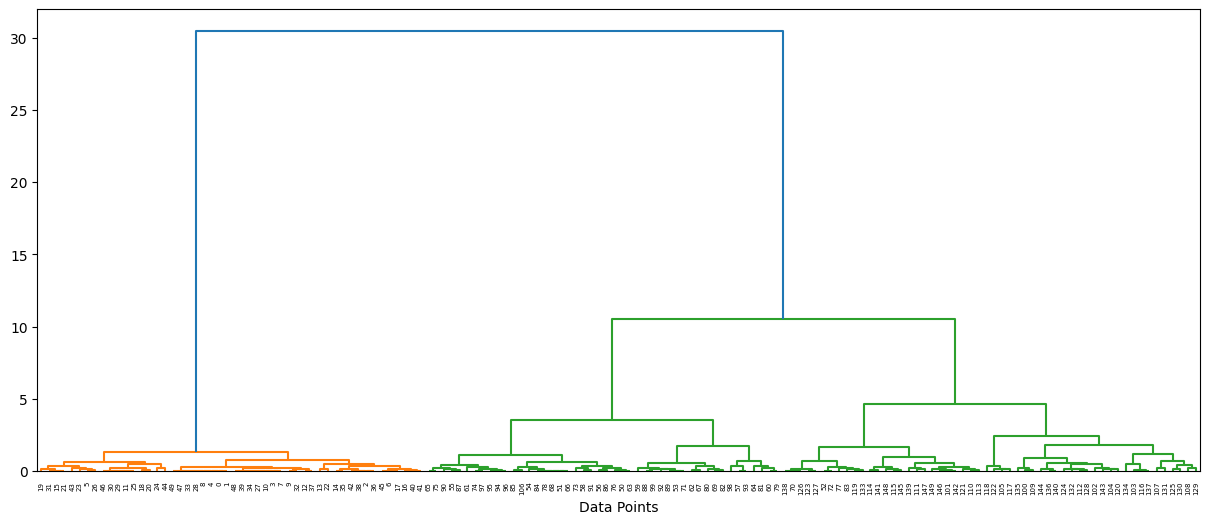

In [6]:
# Dendograma (gráfico de conexiones de agrupamientos)
import scipy.cluster.hierarchy as sch

plt.figure(figsize = (15, 6))
sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.xlabel('Data Points');

# DBSCAN

- Density-based spatial clustering of applications with noise
- Algoritmo capaz de identificar clúster de agrupación en base a la "densidad" de los datos.
- Paso a paso:
    - Por cada instancia, se cuentan cuántas instancias están dentro de una distancia $\epsilon$ (vecindario $\epsilon$)
    - Si una instancia tienen al menos `min_samples` instancias en su vecindario, es considerada una instancia `core`.
    - Todas las instancias en el vecindario de una instancia core pertenecen al mismo clúster (incluídas otras instancias core).
    - Cualquier instancia que no sea una instancia core o no pertenezca a un vecindario, es considerada anomalía.

In [7]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data[:,2:]
y = iris.target


dbscan = DBSCAN(eps=0.2, min_samples=5)
y_pred = dbscan.fit_predict(X)
print(y_pred)

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  1  1  1  1  1  1  1 -1  1  1 -1  1  1  1 -1  1  1 -1  1  1  1  1
  1  1  1  1  1  1  1 -1  1 -1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1
  1  1 -1  1 -1  1  2 -1  2 -1  1 -1 -1 -1  1  1  2  1 -1 -1 -1 -1 -1  1
  2  1 -1  1  2 -1  1  1  2 -1 -1 -1  2  1 -1 -1  2 -1  1  2  2 -1  1  2
  2 -1  1  1 -1  1]


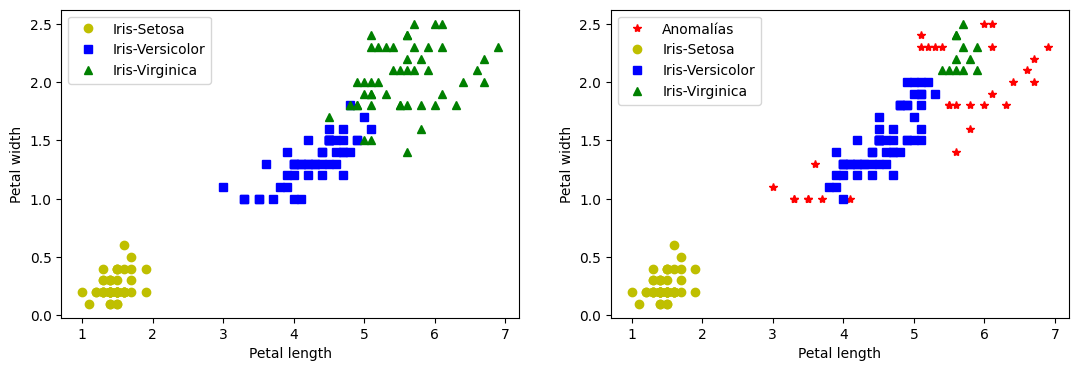

In [8]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(13,4))
ax1 = fig.add_subplot(1,2,1)
ax1.plot(X[y==0,0],X[y==0,1],'yo')
ax1.plot(X[y==1,0],X[y==1,1],'bs')
ax1.plot(X[y==2,0],X[y==2,1],'g^')
ax1.legend(['Iris-Setosa','Iris-Versicolor','Iris-Virginica'])
ax1.set_xlabel('Petal length')
ax1.set_ylabel('Petal width')

# Índice de agrupación cambia, pero agrupaciones se mantienen
ax2 = fig.add_subplot(1,2,2)
ax2.plot(X[y_pred==-1,0],X[y_pred==-1,1],'r*') # Anomalías
ax2.plot(X[y_pred==0,0],X[y_pred==0,1],'yo')
ax2.plot(X[y_pred==1,0],X[y_pred==1,1],'bs')
ax2.plot(X[y_pred==2,0],X[y_pred==2,1],'g^')
# ax2.plot(X[y_pred==3,0],X[y_pred==3,1],'k.')
ax2.legend(['Anomalías', 'Iris-Setosa','Iris-Versicolor','Iris-Virginica'])
ax2.set_xlabel('Petal length')
ax2.set_ylabel('Petal width')

plt.show()

# Actividad 7

Scikit Learn no solo provee algunos datasets populares. También incluye `toy datasets`, los cuales son datasets para comprobar las particularidades de distintos modelos.

- Estudie el toy dataset Make Moons disponible en scikit learn [aquí](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html)
- Genere un dataset con 1000 muestras y ruido (noise) $0.05$.
- Utilice los distintos algoritmos de clustering para identificar agrupaciones de datos. Utilice matplotlib para mostrar gráficamente cuál de ellos se ajusta mejor.

In [ ]:
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")
#codigo extra, para que imagenes de matplotlib
#estén centradas en las diapositivas, ejecutar antes de lanzar los ejemplos.